# Lab 6: Functions

## Your Name: Caroline Petersen

This week, we'll practice wirting and using functions.

First, let's import the necessary modules.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# style
# plt.style.use('fivethirtyeight')
plt.style.use("ggplot")

## 1. Letter Grades

Let's write some code to compute letter grades based on a given curve.

**Question 1.1:** Write a function `letter_grade` that takes two arguments, a float `grade` and an array/list `curve`, the latter containing the cut off grades for the letter grades F, D, C, B, and A in that order.

The default `curve` is given in the signature of the function below as `[60, 70, 80, 90]`, meaning that, by default, grades strictly below a 60 should return `'F'`, grades below and including 60 and strictly below 70 should return `'D'`, and so on, ending with all grades equal to 90 and above returning `'A'`.

Thus, this function should return a single letter string for the given value of `grade`, depending on the cut offs in the optional argument `curve`.

In [56]:
def letter_grade(grade, curve=[60, 70, 80, 90]):
    """
    Given a grade and a list curve containing the cuff offs
    for the letter grades, returns the string with the letter
    grade.
    """
    if grade < curve[0]: 
        return "F"
    if curve[0] <= grade < curve[1]:
        return "D"
    if curve[1] <= grade < curve[2]:
        return "C"
    if curve[2] <= grade < curve[3]: 
        return "B"
    if grade >= curve[3]: 
        return "A"

Run the tests below to check if your function works.  You should get all `True`.

In [57]:
print("Default curve:")
print(letter_grade(38) == "F")
print(letter_grade(60) == "D")
print(letter_grade(64) == "D")
print(letter_grade(70) == "C")
print(letter_grade(78) == "C")
print(letter_grade(80) == "B")
print(letter_grade(81) == "B")
print(letter_grade(90) == "A")
print(letter_grade(95) == "A")
print("")

custom_curve = [50, 63, 75, 87]

print("Custom curve:")
print(letter_grade(49, curve=custom_curve) == "F")
print(letter_grade(50, curve=custom_curve) == "D")
print(letter_grade(62, curve=custom_curve) == "D")
print(letter_grade(63, curve=custom_curve) == "C")
print(letter_grade(70, curve=custom_curve) == "C")
print(letter_grade(75, curve=custom_curve) == "B")
print(letter_grade(77, curve=custom_curve) == "B")
print(letter_grade(87, curve=custom_curve) == "A")
print(letter_grade(95, curve=custom_curve) == "A")

Default curve:
True
True
True
True
True
True
True
True
True

Custom curve:
True
True
True
True
True
True
True
True
True


---

### Using `apply` with Functions with Many Arguments


Suppose we want to replace all negative numbers in a data frame column (or series) with zero.  One way to do it would be to replace each value in the column, say `x`, with `max(0, x)`.

If we were to do that using `.apply`, we face a problem that `max` takes two arguments, but `.apply` will pass only one argument to the function (the value from the row), while we would want the second argument to always be `0`.  We can use a `lambda`-function for that:

```python
lambda x: max(0, x)
```

gives a function that takes only one argument, and thus can be passed to `.apply`.  For example:

In [58]:
df = pd.DataFrame({"Col": np.random.randint(-5, 5, 20)})
df

,Col
0,-5
1,1
2,0
3,2
4,2
5,-3
6,-2
7,-5
8,4
9,-3


In [59]:
df["Col"].apply(lambda x: max(0, x))

0     0
1     1
2     0
3     2
4     2
5     0
6     0
7     0
8     4
9     0
10    3
11    0
12    2
13    2
14    1
15    3
16    1
17    0
18    2
19    0
Name: Col, dtype: int64

---

**Question 1.2:** Create a function `add_letter_grade` that takes a data frame `df`, a column label `col` for a column containing grades, and an array/list `curve` as in the previous problem (with the same default value), and then returns a new data frame with an extra column called `Letter Grade` added, containing the letter grades for the `col` column.

*Hints:* 
  1. Use `.assign` to create the new column.
  2. The function `letter_grade` might come handy.
  3. `.apply` might also come handy.
  4. The note above can help you pass `curve` to `letter_grade` in `.apply`.
  4. `.assign` cannot create columns with space in their names, so you might need to use `.rename`.
  5. To pass a list saved in the variable `curve` as the optional argument also named `curve` of `letter grade` (with grade `grade`), you can simply do `letter_grade(grade, curve=curve)`.  (The two `curve`'s do not cause any syntax problems.)

In [60]:
def add_letter_grade(df, col, curve=[60, 70, 80, 90]):
    """
    Given a data frame df, a label col for a column containing grades,
    and a list/array curve containing the cut offs for the letter grades,
    returns a data frame containing an extra column with the letter
    grades.
    """
    return df.assign(
        temp_name = df[col].apply(lambda x: letter_grade(x, curve = curve))
    ).rename(columns={"temp_name": "Letter Grade"})

Now, test it below.  (Don't worry if you see negative grades or grades above 100.)

In [61]:
grades_df = pd.DataFrame({"Grades": np.int32(np.random.normal(75, 15, 30))})

add_letter_grade(grades_df, "Grades", curve=[57, 68, 79, 90]).sort_values(
    "Grades", ascending=False
)

,Grades,Letter Grade
1,104,A
12,97,A
5,96,A
9,93,A
15,92,A
29,88,B
6,84,B
17,84,B
21,83,B
16,82,B


---

### Using `apply` with Rows

As seen in class, we can also use `.apply` to *rows* of a data frame.  

For example, if the data frame is `df` and the function to apply to rows is `row_function`, we do:

```python
df.apply(row_function, axis=1)
```

So, if we want to add a column with the sum of the squares of the values on a row, we can do:

In [62]:
df = pd.DataFrame(
    {
        "A": np.random.randint(1, 11, 10),
        "B": np.random.randint(1, 11, 10),
        "C": np.random.randint(1, 11, 10),
    }
)
df

,A,B,C
0,4,10,8
1,9,9,6
2,1,3,1
3,4,1,2
4,3,7,9
5,1,3,3
6,4,3,4
7,6,5,1
8,6,10,2
9,5,5,5


In [63]:
df.apply(lambda row: np.sum(row**2), axis=1)

0    180
1    198
2     11
3     21
4    139
5     19
6     41
7     62
8    140
9     75
dtype: int64

In [64]:
df.assign(tmp_name=df.apply(lambda row: np.sum(row**2), axis=1)).rename(
    columns={"tmp_name": "Sum of Squares"}
)

,A,B,C,Sum of Squares
0,4,10,8,180
1,9,9,6,198
2,1,3,1,11
3,4,1,2,21
4,3,7,9,139
5,1,3,3,19
6,4,3,4,41
7,6,5,1,62
8,6,10,2,140
9,5,5,5,75


---

**Question 1.3:** Create a function `add_average` that takes in a data frame `df` and adds a column labeled `Average` containing the average of the values for all columns, *with the lowest score dropped*, and rounded to two decimal places.

*Hint:* A trick to drop the lowest score of row in the average is to subtract the minimum from the sum and divided by the total number of entries *minus one*, as in

```python
(np.sum(row) - np.min(row)) / (len(row) - 1)
```

In [65]:
def add_average(df):
    """
    Given a data frame df containing numerical rows, returns a data frame
    with a the extra column Average with the average of the rows with
    lowest value dropped.
    """
    return df.assign(
        Average=df.apply(
            lambda row: np.round ((np.sum(row) - np.min(row)) / (len(row) - 1), 2),
            axis=1,
        )
    )

Test is in the example below:

In [66]:
grades_df = pd.DataFrame(
    {
        "Exam 1": np.int32(np.random.normal(75, 15, 10)),
        "Exam 2": np.int32(np.random.normal(70, 10, 10)),
        "Exam 3": np.int32(np.random.normal(80, 20, 10)),
        "Exam 4": np.int32(np.random.normal(78, 10, 10)),
    }
)
grades_df

,Exam 1,Exam 2,Exam 3,Exam 4
0,73,45,75,82
1,64,80,64,82
2,77,66,71,65
3,85,68,79,80
4,69,64,110,77
5,73,82,69,83
6,70,55,94,81
7,64,76,54,86
8,49,65,84,67
9,48,82,57,78


In [67]:
add_average(grades_df)

,Exam 1,Exam 2,Exam 3,Exam 4,Average
0,73,45,75,82,76.67
1,64,80,64,82,75.33
2,77,66,71,65,71.33
3,85,68,79,80,81.33
4,69,64,110,77,85.33
5,73,82,69,83,79.33
6,70,55,94,81,81.67
7,64,76,54,86,75.33
8,49,65,84,67,72.00
9,48,82,57,78,72.33


**Question 1.4:** Put it all together in a function `course_grade` that takes a data frame `df` containing the exam grades (like our last `grades_df` above), adds an `Average` column, then adds a `Letter Grade` column based on the averages, using the optional argument `curve` for the cut off grades.

*Hint:* Don't reinvent the wheel!  All the hard work was done in the previous parts.

In [68]:
def course_grade(df, curve=[60, 70, 80, 90]):
    """
    Given a data frame df containing grades and a list curve containing
    the cut offs for letter grades, adds a column Average containing the
    average of the grades with the lowest score removed, and a column
    Letter Grade with the letter grade for the Average.
    """
    return add_letter_grade(add_average(df), "Average", curve=curve)

In [69]:
course_grade(grades_df)

,Exam 1,Exam 2,Exam 3,Exam 4,Average,Letter Grade
0,73,45,75,82,76.67,C
1,64,80,64,82,75.33,C
2,77,66,71,65,71.33,C
3,85,68,79,80,81.33,B
4,69,64,110,77,85.33,B
5,73,82,69,83,79.33,C
6,70,55,94,81,81.67,B
7,64,76,54,86,75.33,C
8,49,65,84,67,72.00,C
9,48,82,57,78,72.33,C


## 2. Shortcuts for Graphing

**Question 2.1:** We often tweak graphs to better suit our preferences.  So, let's create a function `density_hist` that takes a data frame `df`, a column label `col`, and an optional argument `bins` *with default value of 20* (instead of the usual 10), and then draws a *density* histogram for that column, with the option `ec=white` (to better visualize the bars), and color green (option `color="green"`).

**Note:** Functions that just plots a graph do not need a `return` statement (or `plt.show()`).  The body just needs the necessary plot code.

In [70]:
def density_hist(df, col, bins=20):
    """
    Given a data frame df, a column label col, and optionally bins
    (with default 20), plots the density histogram for the values
    in the column, in green, with white boundaries around the bars,
    in color green, and with the given bins.
    """
    df.hist(col, ec="white", color="green", bins=bins)

Let's test it:

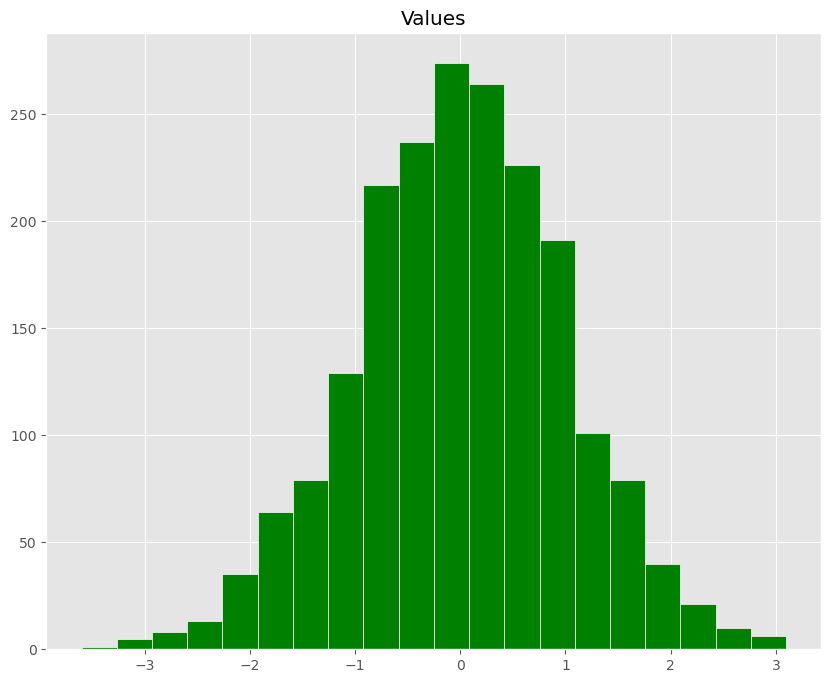

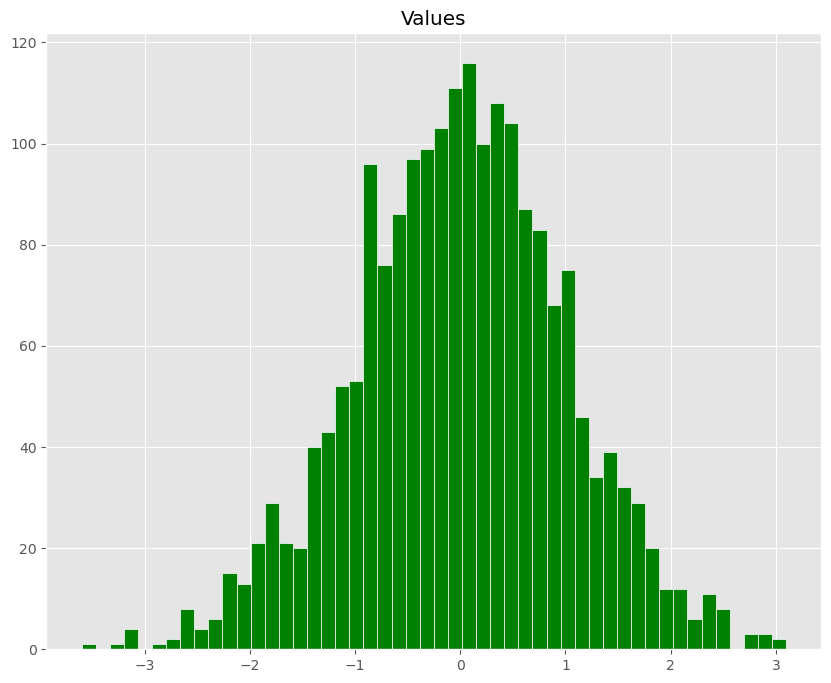

In [71]:
df = pd.DataFrame({"Values": np.random.normal(size=2000)})
density_hist(df, "Values")
density_hist(df, "Values", bins=50)

---

### Overlaying Scatter Plots

Remember that overlaying scatter plots is not as easy in pandas, but we've seen how to do it.

Here is an example:

In [72]:
df = pd.DataFrame(
    {
        "Col 1": np.arange(0, 1.01, 0.01),
        "Col 2": np.arange(0, 1.01, 0.01) ** (1 / 2) * np.random.random(101),
        "Col 3": np.arange(0, 1.01, 0.01) ** 2 * np.random.random(101),
    }
)

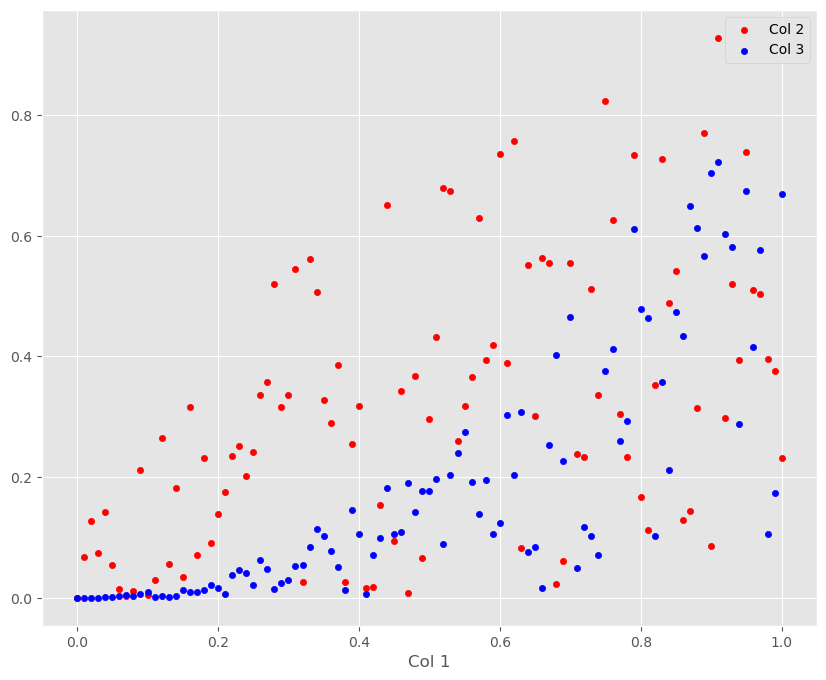

In [73]:
ax1 = df.plot("Col 1", "Col 2", kind="scatter", color="red", label="Col 2")
df.plot("Col 1", "Col 3", kind="scatter", color="blue", label="Col 3", ax=ax1)
plt.ylabel("")  # remove the label for the y-axis, or it will show only last
plt.show()

---

**Question 2.2:** Write a function `overlaid_scatter` that does the job above.  It takes a data frame `df`, a column `xcol` for the x-values, and two columns `ycol1` and `ycol2` for the y-values.  It should return a scatter plot containing both plots for `xcol` and `ycol1` and `xcol` and `ycol2`, with colors red and blue, respectively, and the labels for each plot (used in the legend) should be the column labels given by the arguments `ycol1` and `ycol2` respectively.

*Hint:* You basically just need to turn the code above into a function.

In [74]:
def overlaid_scatter(df, xcol, ycol1, ycol2):
    """
    Given a data frame df, column labels xcol, ycol1, ycol2, plots
    overlaid scatter plots for (xcol, ycol1) and (xcol, ycol2), in
    colors red and blue, and labels ycol1 and ycol2, respectively.
    """
    ax1 = df.plot(xcol, ycol1, kind="scatter", label=ycol1, color="red")
    df.plot(xcol, ycol2, kind="scatter", label=ycol2, color="blue", ax=ax1)
    plt.ylabel("")

If we test in the same `df` as above, the result should be identical:

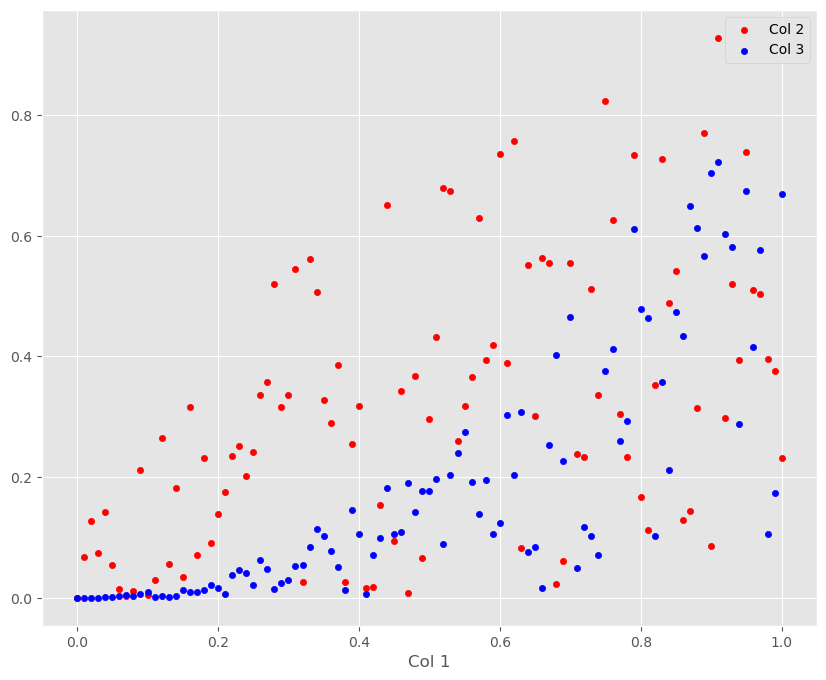

In [75]:
overlaid_scatter(df, "Col 1", "Col 2", "Col 3")

**Question 2.3:** Write a function `plot_with_average` that takes a data frame `df` a column `xcol` for the x-axis, and *two* columns `ycol1` and `ycol2` for the y-axes and then draws *line plots* for `xcol` and `ycol1`, `xcol` and `ycol2`, *and* `xcol` and the average between `ycol1` and `ycol2`.

*Hint:* Unlike scatter plots, line plots are easy to overlay in pandas.  You can start by adding a column `Average` with the average of `ycol1` and `ycol2`, and then using the resulting data frame for the plots. 

In [76]:
def plot_with_average(df, xcol, ycol1, ycol2):
    """
    Given a data frame df, plots the line graphs for (xcol, ycol1) and
    (xcol, ycol2), together with the graph for (xcol, average of ycol1 and ycol2).
    """
    df.assign(Average=(df[ycol1] + df[ycol2]) / 2).plot(xcol, [ycol1, ycol2, "Average"])

Let's test it:

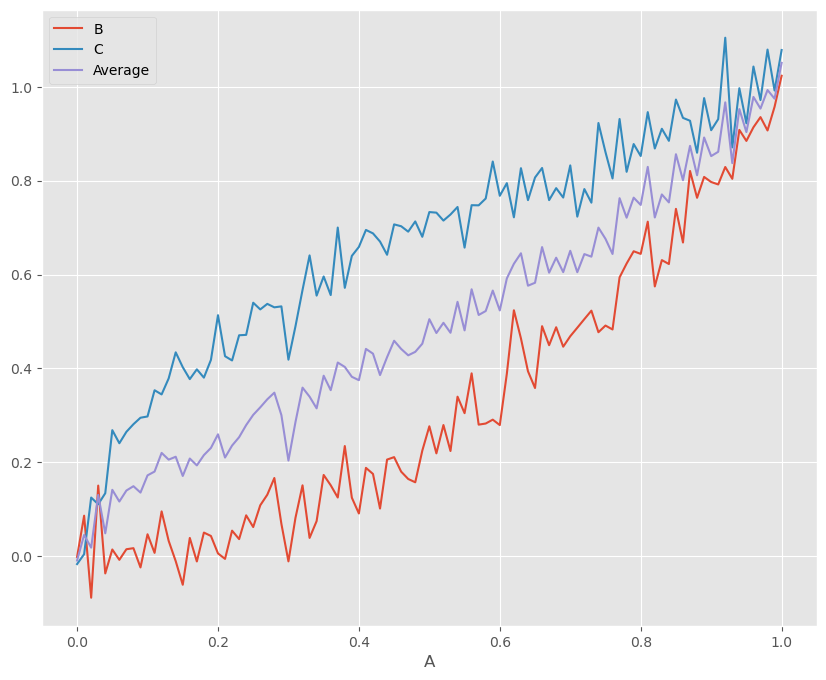

In [77]:
x_array = np.arange(0, 1.01, 0.01)
df = pd.DataFrame(
    {
        "A": x_array,
        "B": x_array**2 + 0.05 * np.random.normal(size=101),
        "C": x_array ** (1 / 2) + 0.05 * np.random.normal(size=101),
    }
)

plot_with_average(df, "A", "B", "C")

## 3. Clean Up Automation

Often we get data frames in a format outside our preference, and thus we need to take some steps to "clean up" or adjust it.  If we get data frames in the same format often, it is convenient to save all steps in a function, so that the next time we need to do clean it up, we only need to call our function.

In this section we will illustrate this process.  For the sake of brevity, I will show all the steps (although you should be able to write the code for *most* steps yourself!), and all you need yo do is to collect the steps in a single function at the end.

We will use this example of compensation of CEOs at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [SEC filings](https://www.sec.gov/answers/proxyhtf.htm).  Two companies have two CEOs, so there are 102 CEOs in the dataset.

The data are in a file called `raw_compensation.csv`.  (We remove the last entry of the dataset, since it has no real information.)

In [78]:
raw_compensation = pd.read_csv("raw_compensation.csv").iloc[:-1]
raw_compensation

,Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
0,1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362.00
1,2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362.00
2,3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477.00
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342.00
4,5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338.00
...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.53,-66%,$1.50,$0.00,$0.04,26.00
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.94,-11%,$0.93,$0.00,$0.02,17.00
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.81,-7%,$0.71,$0.00,$0.10,32.00
99,100,Jack Dorsey,Twitter (San Francisco),$0.07,(No previous year),$0.00,$0.00,$0.07,0.63


First, note that `Total Pay` and `% Change` are stings (`object`):

In [79]:
raw_compensation.dtypes

Rank                                                 int64
Name                                                object
Company (Headquarters)                              object
Total Pay                                           object
% Change                                            object
Cash Pay                                            object
Equity Pay                                          object
Other Pay                                           object
Ratio of CEO pay to average industry worker pay    float64
dtype: object

We want to convert them to floats.  The problem for `Total Pay` is that we have the `$` as part of the strings.  So, we need to remove it and then convert it to a float.  We use the method [.str.strip](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html) from pandas to remove the `$`.  (Note that `.str.strip` is used to remove characters from the beginning and end of strings, so it works well here.)

In [80]:
(
    raw_compensation.copy()  # make copy!  We don't want to change the original!
    .drop(columns=["Total Pay", "% Change"])  # drop old columns
    .assign(
        total_pay=raw_compensation["Total Pay"].str.strip("$").astype(float)
    )  # remove $ and convert
)

,Rank,Name,Company (Headquarters),Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,total_pay
0,1,Mark V. Hurd*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.25
1,2,Safra A. Catz*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.24
2,3,Robert A. Iger,Walt Disney (Burbank),$24.89,$17.28,$2.74,477.00,44.91
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$1.00,$34.43,$0.55,342.00,35.98
4,5,Marc Benioff,salesforce.com (San Francisco),$4.65,$27.26,$1.45,338.00,33.36
...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.50,$0.00,$0.04,26.00,1.53
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.93,$0.00,$0.02,17.00,0.94
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.71,$0.00,$0.10,32.00,0.81
99,100,Jack Dorsey,Twitter (San Francisco),$0.00,$0.00,$0.07,0.63,0.07


Now, we need to deal with the `% Change`.  The conversion is very similar, but there is also the `(No previous year)` entries.  Here one has to make a choice on how to deal with these.  We could drop every row with those values, but let's just replace them with zero instead. 

In [81]:
(
    raw_compensation.copy()  # make copy!  We don't want to change the original!
    .drop(columns=["Total Pay", "% Change"])  # drop old columns
    .assign(
        total_pay=raw_compensation["Total Pay"].str.strip("$").astype(float)
    )  # remove $ and convert
    .assign(
        perc_change=raw_compensation["% Change"]
        .str.replace("(No previous year)", "0", regex=False)  # replace
        .str.strip("%")  # remove %
        .astype(int)  # convert to int
    )
)

,Rank,Name,Company (Headquarters),Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,total_pay,perc_change
0,1,Mark V. Hurd*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.25,0
1,2,Safra A. Catz*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.24,0
2,3,Robert A. Iger,Walt Disney (Burbank),$24.89,$17.28,$2.74,477.00,44.91,-3
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$1.00,$34.43,$0.55,342.00,35.98,-15
4,5,Marc Benioff,salesforce.com (San Francisco),$4.65,$27.26,$1.45,338.00,33.36,-16
...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.50,$0.00,$0.04,26.00,1.53,-66
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.93,$0.00,$0.02,17.00,0.94,-11
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.71,$0.00,$0.10,32.00,0.81,-7
99,100,Jack Dorsey,Twitter (San Francisco),$0.00,$0.00,$0.07,0.63,0.07,0


Let's now add a column with the previous year pay, which is easy to do now since we have numerical values for `Total Pay` and `% Change`:

In [82]:
(
    raw_compensation.copy()  # make copy!  We don't want to change the original!
    .drop(columns=["Total Pay", "% Change"])  # drop old columns
    .assign(
        total_pay=raw_compensation["Total Pay"].str.strip("$").astype(float)
    )  # remove $ and convert
    .assign(
        perc_change=raw_compensation["% Change"]
        .str.replace("(No previous year)", "0", regex=False)  # replace
        .str.strip("%")  # remove %
        .astype(int)  # convert to int
    )
    .assign(
        prev_year=lambda df_: np.round(
            df_["total_pay"] / (1 + df_["perc_change"] / 100), 2
        )
    )
    .rename(
        columns={
            "total_pay": "Total Pay ($)",
            "perc_change": "Percent Change (%)",
            "prev_year": "Previous Year Total Pay",
        }
    )
)

,Rank,Name,Company (Headquarters),Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),Percent Change (%),Previous Year Total Pay
0,1,Mark V. Hurd*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.25,0,53.25
1,2,Safra A. Catz*,Oracle (Redwood City),$0.95,$52.27,$0.02,362.00,53.24,0,53.24
2,3,Robert A. Iger,Walt Disney (Burbank),$24.89,$17.28,$2.74,477.00,44.91,-3,46.30
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),$1.00,$34.43,$0.55,342.00,35.98,-15,42.33
4,5,Marc Benioff,salesforce.com (San Francisco),$4.65,$27.26,$1.45,338.00,33.36,-16,39.71
...,...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),$1.50,$0.00,$0.04,26.00,1.53,-66,4.50
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),$0.93,$0.00,$0.02,17.00,0.94,-11,1.06
98,99,Jose L. Laparte,PriceSmart (San Diego),$0.71,$0.00,$0.10,32.00,0.81,-7,0.87
99,100,Jack Dorsey,Twitter (San Francisco),$0.00,$0.00,$0.07,0.63,0.07,0,0.07


Finally, we change the order of the columns:

In [83]:
(
    raw_compensation.copy()  # make copy!  We don't want to change the original!
    .drop(columns=["Total Pay", "% Change"])  # drop old columns
    .assign(
        total_pay=raw_compensation["Total Pay"].str.strip("$").astype(float)
    )  # remove $ and convert
    .assign(
        perc_change=raw_compensation["% Change"]
        .str.replace("(No previous year)", "0", regex=False)  # replace
        .str.strip("%")  # remove %
        .astype(int)  # convert to int
    )
    .assign(
        prev_year=lambda df_: np.round(
            df_["total_pay"] / (1 + df_["perc_change"] / 100), 2
        )
    )
    .rename(
        columns={
            "total_pay": "Total Pay ($)",
            "perc_change": "Percent Change (%)",
            "prev_year": "Previous Year Total Pay",
        }
    )[  # rename columns
        [
            "Rank",
            "Name",
            "Company (Headquarters)",
            "Ratio of CEO pay to average industry worker pay",
            "Cash Pay",
            "Equity Pay",
            "Other Pay",
            "Previous Year Total Pay",
            "Total Pay ($)",
            "Percent Change (%)",
        ]
    ]
)

,Rank,Name,Company (Headquarters),Ratio of CEO pay to average industry worker pay,Cash Pay,Equity Pay,Other Pay,Previous Year Total Pay,Total Pay ($),Percent Change (%)
0,1,Mark V. Hurd*,Oracle (Redwood City),362.00,$0.95,$52.27,$0.02,53.25,53.25,0
1,2,Safra A. Catz*,Oracle (Redwood City),362.00,$0.95,$52.27,$0.02,53.24,53.24,0
2,3,Robert A. Iger,Walt Disney (Burbank),477.00,$24.89,$17.28,$2.74,46.30,44.91,-3
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),342.00,$1.00,$34.43,$0.55,42.33,35.98,-15
4,5,Marc Benioff,salesforce.com (San Francisco),338.00,$4.65,$27.26,$1.45,39.71,33.36,-16
...,...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),26.00,$1.50,$0.00,$0.04,4.50,1.53,-66
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),17.00,$0.93,$0.00,$0.02,1.06,0.94,-11
98,99,Jose L. Laparte,PriceSmart (San Diego),32.00,$0.71,$0.00,$0.10,0.87,0.81,-7
99,100,Jack Dorsey,Twitter (San Francisco),0.63,$0.00,$0.00,$0.07,0.07,0.07,0


**Question 3.1:** Create a function `clean_up_compensation` that simply takes a data frame `df` and performs all the steps done above.

*Hint:* This is *very* easy now.  Just copy and paste, then adjust as needed.

In [84]:
def clean_up_compensation(df):
    """
    Given a compensation df, clean it up by:
    * Converting Total Compensation and % Change to numerical columns,
    * Adding a Previouos Year Total Pay column.
    * Reordering the columns.
    """
    return (
    df.copy()  # make copy!  We don't want to change the original!
    .drop(columns=["Total Pay", "% Change"])  # drop old columns
    .assign(
        total_pay=raw_compensation["Total Pay"].str.strip("$").astype(float)
    )  # remove $ and convert
    .assign(
        perc_change=raw_compensation["% Change"]
        .str.replace("(No previous year)", "0", regex=False)  # replace
        .str.strip("%")  # remove %
        .astype(int)  # convert to int
    )
    .assign(
        prev_year=lambda df_: np.round(
            df_["total_pay"] / (1 + df_["perc_change"] / 100), 2
        )
    )
    .rename(
        columns={
            "total_pay": "Total Pay ($)",
            "perc_change": "Percent Change (%)",
            "prev_year": "Previous Year Total Pay",
        }
    )[  # rename columns
        [
            "Rank",
            "Name",
            "Company (Headquarters)",
            "Ratio of CEO pay to average industry worker pay",
            "Cash Pay",
            "Equity Pay",
            "Other Pay",
            "Previous Year Total Pay",
            "Total Pay ($)",
            "Percent Change (%)",
        ]
    ]
)

The test below should give the exact same data frame as above.

In [85]:
clean_up_compensation(raw_compensation)

,Rank,Name,Company (Headquarters),Ratio of CEO pay to average industry worker pay,Cash Pay,Equity Pay,Other Pay,Previous Year Total Pay,Total Pay ($),Percent Change (%)
0,1,Mark V. Hurd*,Oracle (Redwood City),362.00,$0.95,$52.27,$0.02,53.25,53.25,0
1,2,Safra A. Catz*,Oracle (Redwood City),362.00,$0.95,$52.27,$0.02,53.24,53.24,0
2,3,Robert A. Iger,Walt Disney (Burbank),477.00,$24.89,$17.28,$2.74,46.30,44.91,-3
3,4,Marissa A. Mayer,Yahoo! (Sunnyvale),342.00,$1.00,$34.43,$0.55,42.33,35.98,-15
4,5,Marc Benioff,salesforce.com (San Francisco),338.00,$4.65,$27.26,$1.45,39.71,33.36,-16
...,...,...,...,...,...,...,...,...,...,...
96,97,David G. Hirz,Smartæ& Final Stores (Commerce),26.00,$1.50,$0.00,$0.04,4.50,1.53,-66
97,98,Gregory N. Roberts,A-Mark Precious Metals (Santa Monica),17.00,$0.93,$0.00,$0.02,1.06,0.94,-11
98,99,Jose L. Laparte,PriceSmart (San Diego),32.00,$0.71,$0.00,$0.10,0.87,0.81,-7
99,100,Jack Dorsey,Twitter (San Francisco),0.63,$0.00,$0.00,$0.07,0.07,0.07,0


## 4. Submission

 **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 6 (under Assignments). To export, go to the toolbar at the top of this page, click File > Download. Then, go to our class's Canvas page and upload your file under "Lab 6".
 
For easy identification, **please add your surname to the file**, as in: lab_06_DS201_Name.ipynb